In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline
import pandas as pd

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
X = data[['sepal_length']].to_numpy().flatten()
y = data['petal_length'].to_numpy()

In [20]:
print ('The shape of x_train is:', X.shape)
print ('The shape of y_train is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of x_train is: (150,)
The shape of y_train is:  (150,)
Number of training examples (m): 150


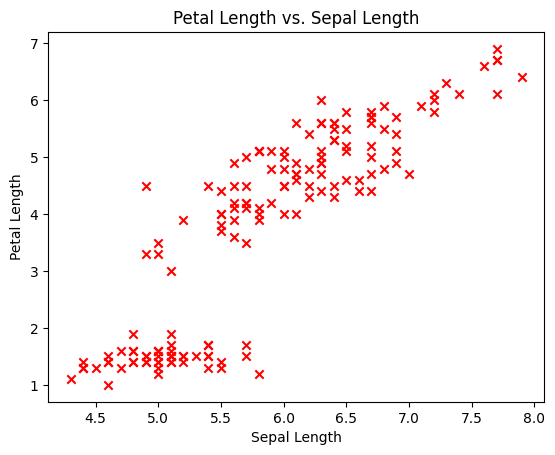

In [11]:
plt.scatter(X, y, marker='x', c='r')

plt.title('Petal Length vs. Sepal Length')
plt.ylabel('Petal Length')
# Set the x-axis label
plt.xlabel('Sepal Length')
plt.show()

In [ ]:
def compute_cost(x,y,w,b): 

    total_cost=0
    m=x.shape[0]
    cost=np.zeros(m)

    cost= (w*x+b-y)**2

    total_cost=np.sum(cost)

    total_cost=(total_cost)/(2*m)
    
    return total_cost

In [25]:
initial_w=2
initial_b=1

cost=compute_cost(X, y, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 40.239


In [30]:
def compute_gradient(x, y, w, b):

    m=x.shape[0]

    dj_dw=np.zeros(m)
    dj_db=np.zeros(m)

    dj_dw=(w*x+b-y)*x
    dj_db=(w*x+b-y)

    dj_dw=np.sum(dj_dw)/m
    dj_db=np.sum(dj_db)/m

    return dj_dw, dj_db

    

In [31]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X, y, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -15.091266666666664 -2.389333333333334


In [28]:
def gradient_descent(x,y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m=len(x)

    J_history=[]
    w_history=[]

    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):

        dj_dw, dj_db= compute_gradient(x, y, w, b)

        w= w- alpha*dj_dw
        b= b- alpha*dj_db

        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [32]:

initial_w=0.
initial_b=0.

iterations=1500
alpha=0.01

w,b,_,_=gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     4.06   
Iteration  150: Cost     0.85   
Iteration  300: Cost     0.82   
Iteration  450: Cost     0.80   
Iteration  600: Cost     0.78   
Iteration  750: Cost     0.75   
Iteration  900: Cost     0.73   
Iteration 1050: Cost     0.71   
Iteration 1200: Cost     0.69   
Iteration 1350: Cost     0.68   
w,b found by gradient descent: 0.9484843483615001 -1.6812051922335502


In [ ]:
m=X.shape[0]
predicted=np.zeros(m)

predicted=w*X+b
print(predicted[100:])
print(y[100:])


new_data = np.array([[5.1], [6.3]])
predictions = new_data*w+b
print(predictions)

[4.2942462  3.82000403 5.05303368 4.2942462  4.48394307 5.52727586
 2.96636811 5.24273055 4.67363994 5.14788212 4.48394307 4.38909464
 4.76848838 3.72515559 3.82000403 4.38909464 4.48394307 5.62212429
 5.62212429 4.0097009  4.86333681 3.63030716 5.62212429 4.2942462
 4.67363994 5.14788212 4.19939777 4.10454933 4.38909464 5.14788212
 5.33757899 5.81182116 4.38909464 4.2942462  4.10454933 5.62212429
 4.2942462  4.38909464 4.0097009  4.86333681 4.67363994 4.86333681
 3.82000403 4.76848838 4.67363994 4.67363994 4.2942462  4.48394307
 4.19939777 3.91485246]
[6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7
 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.  4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1
 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9 5.7 5.2 5.  5.2 5.4 5.1]


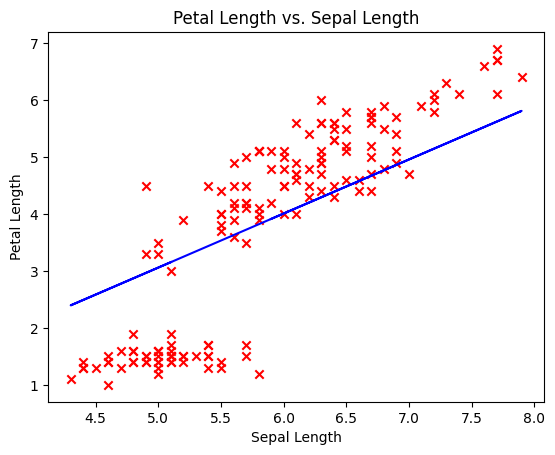

In [34]:
plt.plot(X, predicted, c = "b")


plt.scatter(X, y, marker='x', c='r') 

plt.title('Petal Length vs. Sepal Length')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Length')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()
newX = data[['sepal_length']]  # ✅ Already 2D
newy = data['petal_length']
X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

     sepal_length
73       4.104549
18       3.725156
118      5.622124
78       4.009701
76       4.768488
31       3.440610
64       3.630307
141      4.863337
68       4.199398
82       3.820004
110      4.483943
12       2.871520
36       3.535459
9        2.966368
19       3.156065
56       4.294246
104      4.483943
69       3.630307
55       3.725156
132      4.389095
29       2.776671
127      4.104549
26       3.061217
128      4.389095
131      5.811821
145      4.673640
108      4.673640
143      4.768488
45       2.871520
30       2.871520
[4.26004412 3.52645908 7.19438428 4.07664786 5.54381794 2.9762703
 3.34306282 5.7272142  4.44344038 3.70985534 4.99362916 1.87589274
 3.15966656 2.059289   2.42608152 4.62683664 4.99362916 3.34306282
 3.52645908 4.8102329  1.69249648 4.26004412 2.24268526 4.8102329
 7.5611768  5.36042168 5.36042168 5.54381794 1.87589274 1.87589274]


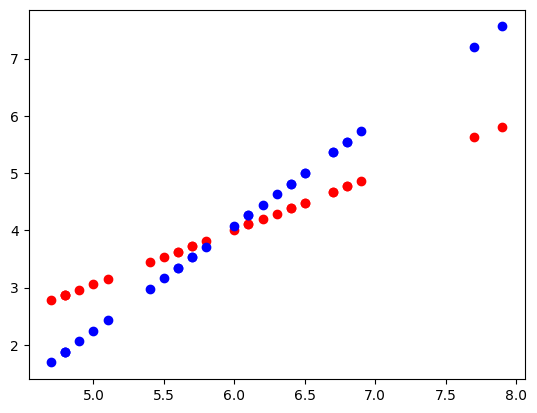

In [43]:

predictions = X_test*w+b
print(predictions)

predictions2= model.predict(X_test)
print(predictions2)

plt.scatter(X_test, predictions, c='r')
plt.scatter(X_test, predictions2, c='b')